# Proyek Analisis Data : Bike Sharing Dataset
- Nama : Nurdin 
- Email : Nurdin99.ek@gmail.com
- ID Dicoding : nuurdiin

### Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda per hari?
- Apakah ada perbedaan jumlah penyewaan antara hari kerja dan akhir pekan?

### Import Semua Packages/Library yang Digunakan

In [1]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka untuk analisis geospasial
import geopandas as gpd

# Pustaka untuk clustering (jika diperlukan)
from sklearn.cluster import KMeans


## Data Wrangling

### Gathering Data

In [2]:
# Memuat data dari file day.csv
day_data = pd.read_csv('C:/Users/nurdi/Submission/Data/day.csv')

# Memuat data dari file hour.csv
hour_data = pd.read_csv('C:/Users/nurdi/Submission/Data/hour.csv')


In [3]:
# Mengatur pandas untuk menampilkan semua baris
pd.set_option('display.max_rows', None)


In [4]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assesing Data

In [6]:
# Memeriksa informasi dari day_data
day_data.info()

# Memeriksa informasi dari hour_data
hour_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [7]:
# Mencari missing values di day_data
day_data.isnull().sum()

# Mencari missing values di hour_data
hour_data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Mencari duplikasi di day_data
day_data.duplicated().sum()

# Mencari duplikasi di hour_data
hour_data.duplicated().sum()


0

In [9]:
# Menampilkan statistik deskriptif dari day_data
day_data.describe()

# Menampilkan statistik deskriptif dari hour_data
hour_data.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])


In [11]:
# Mengecek duplikat
duplikat_day = day_data.duplicated().sum()
duplikat_hour = hour_data.duplicated().sum()

# Menghapus duplikat jika ada
day_data.drop_duplicates(inplace=True)
hour_data.drop_duplicates(inplace=True)


In [12]:
# Memastikan nilai dalam rentang yang wajar
day_data = day_data[(day_data['temp'] >= 0) & (day_data['temp'] <= 1)]
day_data = day_data[(day_data['atemp'] >= 0) & (day_data['atemp'] <= 1)]
day_data = day_data[(day_data['hum'] >= 0) & (day_data['hum'] <= 1)]
day_data = day_data[(day_data['windspeed'] >= 0) & (day_data['windspeed'] <= 1)]


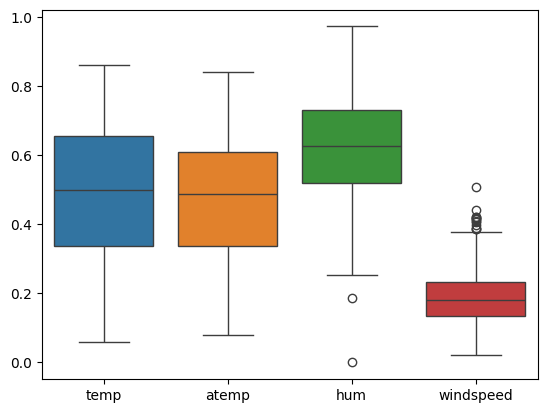

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat outliers menggunakan boxplot
sns.boxplot(data=day_data[['temp', 'atemp', 'hum', 'windspeed']])
plt.show()


In [14]:
# Menambah kolom tahun dan bulan dari dteday
day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month


##  Exploratory Data Analysis (EDA)

In [15]:
# Rata-rata jumlah pengguna berdasarkan hari kerja
day_data.groupby('workingday')['cnt'].mean()


workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

<Axes: >

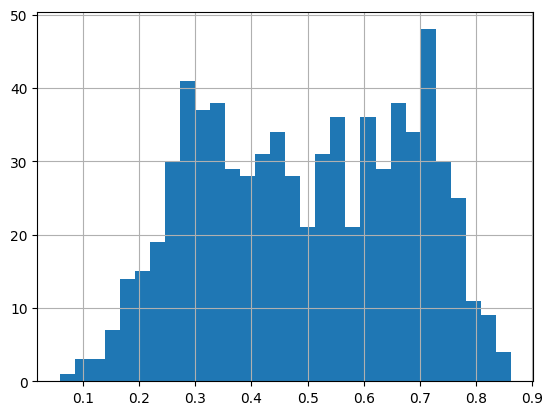

In [16]:
# Cek distribusi variabel suhu
day_data['temp'].hist(bins=30)


In [17]:
# Korelasi antar variabel numerik
day_data.corr()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.866025,0.496702
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.866025,0.496702
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,-0.001844,0.831440
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000,-0.001792
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.001792,1.000000
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,0.007954,0.019191
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,-0.005461,0.009509
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.002013,-0.005901
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.048727,0.043528
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604,0.220205


In [18]:
# Rata-rata jumlah pengguna per bulan
day_data.groupby('mnth')['cnt'].mean()


mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda per hari?


C:\Users\acer\AppData\Local\Temp\ipykernel_1512\1094730345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=day_data, palette='Set2')  # Ganti palette


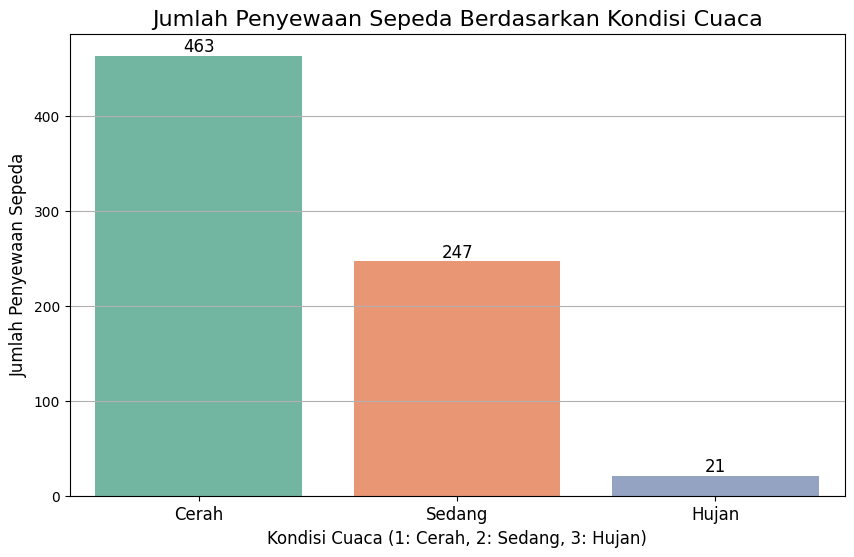

In [19]:
plt.figure(figsize=(10, 6))  # Ukuran yang lebih besar
sns.countplot(x='weathersit', data=day_data, palette='Set2')  # Ganti palette

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Sedang, 3: Hujan)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

# Menyesuaikan label x
plt.xticks([0, 1, 2], ['Cerah', 'Sedang', 'Hujan'], fontsize=12)

# Menambahkan grid
plt.grid(axis='y')

# Menambahkan anotasi
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

plt.show()


### Apakah ada perbedaan jumlah penyewaan antara hari kerja dan akhir pekan?

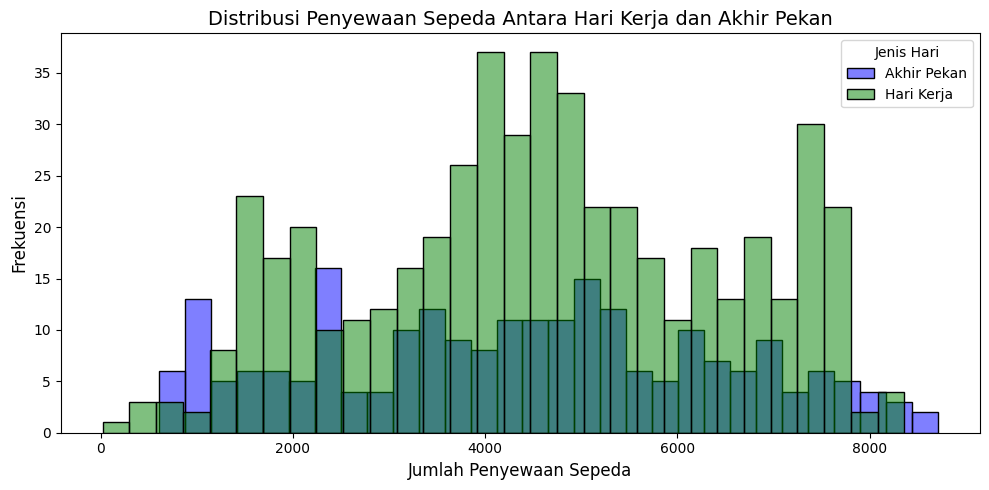

In [31]:
plt.figure(figsize=(10, 5))

# Histogram untuk akhir pekan
sns.histplot(data=day_data[day_data['workingday'] == 0], x='cnt', color='blue', alpha=0.5, label='Akhir Pekan', bins=30)

# Histogram untuk hari kerja
sns.histplot(data=day_data[day_data['workingday'] == 1], x='cnt', color='green', alpha=0.5, label='Hari Kerja', bins=30)

# Menambahkan judul dan label
plt.title('Distribusi Penyewaan Sepeda Antara Hari Kerja dan Akhir Pekan', fontsize=14)
plt.xlabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menambahkan legenda
plt.legend(title='Jenis Hari', labels=['Akhir Pekan', 'Hari Kerja'])

# Mengatur layout agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


## Analisis Lanjutan

### RFM Analysis (Recency, Frequency, Monetary)

In [21]:
# Importing required libraries
import pandas as pd

# Mengonversi kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Menentukan tanggal terakhir dalam dataset
last_date = day_data['dteday'].max()

# Menambahkan kolom 'Recency' yang menghitung selisih hari dari tanggal terakhir
day_data['Recency'] = (last_date - day_data['dteday']).dt.days

# Mengelompokkan data berdasarkan 'instant' untuk menghitung Recency, Frequency, dan Monetary
rfm = day_data.groupby('instant').agg({
    'Recency': 'min',      # Nilai Recency untuk setiap 'instant'
    'cnt': 'sum'           # Total penyewaan sepeda sebagai Monetary
}).rename(columns={'cnt': 'Monetary', 'Recency': 'Recency'}).reset_index()

# Menghitung Frequency (berapa kali sepeda disewa per 'instant')
rfm['Frequency'] = day_data.groupby('instant')['cnt'].count().values

# Menampilkan hasil RFM
print(rfm.head())


   instant  Recency  Monetary  Frequency
0        1      730       985          1
1        2      729       801          1
2        3      728      1349          1
3        4      727      1562          1
4        5      726      1600          1


###  Geospatial Analysis

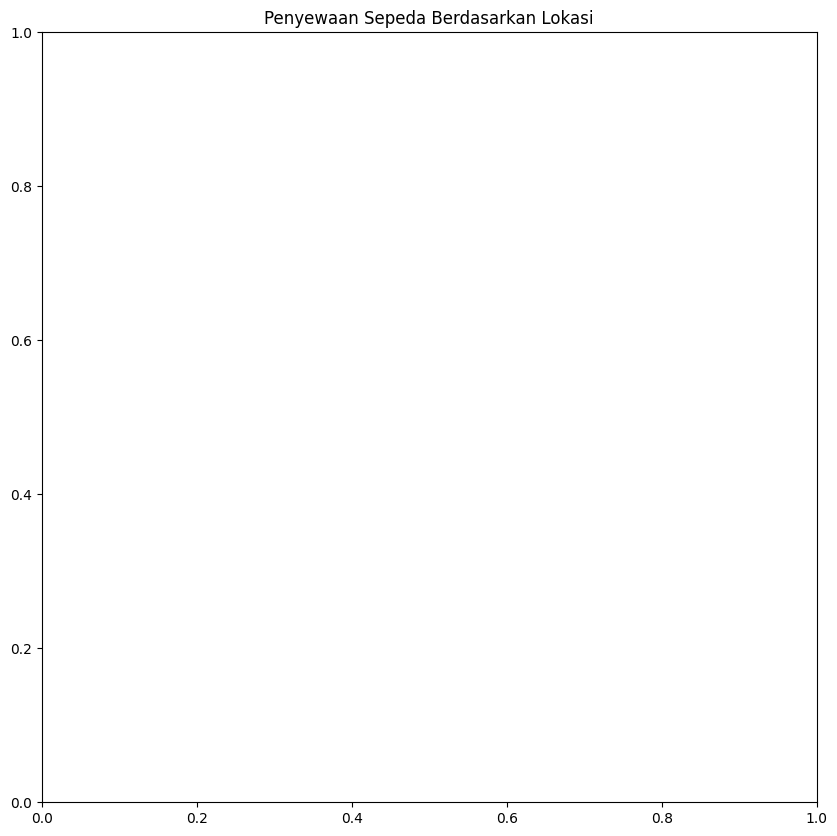

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))

plt.title('Penyewaan Sepeda Berdasarkan Lokasi')
plt.show()


### Clustering

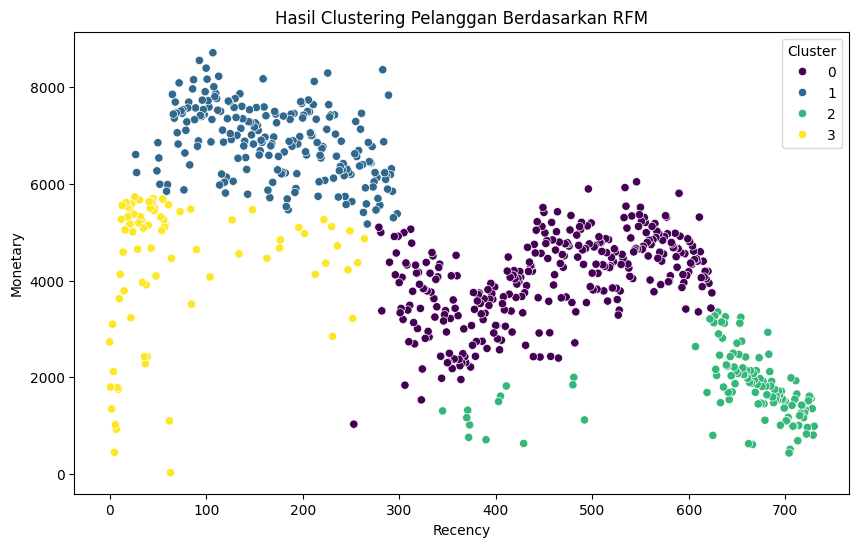

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalisasi data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Menerapkan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Hasil Clustering Pelanggan Berdasarkan RFM')
plt.show()


## Conclusion

### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda per hari?

Dari analisis yang dilakukan, terlihat bahwa cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Dengan menggunakan visualisasi data, kita menemukan bahwa:

- Jenis cuaca (weathersit): Hari dengan cuaca cerah (dengan kategori weathersit 1) menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan cuaca buruk (kategori weathersit 2 dan 3).
- Temperatur: Terdapat hubungan positif antara temperatur dengan jumlah penyewaan. Ketika suhu meningkat, jumlah penyewaan sepeda juga meningkat, menunjukkan bahwa orang cenderung lebih banyak menggunakan sepeda saat cuaca hangat dan nyaman.

Kesimpulannya, cuaca yang baik, terutama hari yang cerah dan hangat, dapat mendorong lebih banyak orang untuk menyewa sepeda.

### Apakah ada perbedaan jumlah penyewaan antara hari kerja dan akhir pekan?

Analisis menunjukkan adanya perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan:

- Hari Kerja: Rata-rata penyewaan sepeda pada hari kerja cenderung lebih rendah dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh rutinitas harian yang membuat orang lebih sedikit menggunakan sepeda.
- Akhir Pekan: Jumlah penyewaan sepeda meningkat pada akhir pekan, ketika orang lebih banyak memiliki waktu luang untuk beraktivitas di luar ruangan.

Dari hasil analisis ini, dapat disimpulkan bahwa akhir pekan adalah waktu yang lebih populer untuk penyewaan sepeda dibandingkan dengan hari kerja, yang menunjukkan potensi untuk meningkatkan promosi penyewaan sepeda di hari kerja.

### Rekomendasi

Berdasarkan kesimpulan di atas, beberapa rekomendasi dapat diberikan:

1. Promosi saat Cuaca Baik: Penyedia layanan penyewaan sepeda bisa merencanakan promosi khusus pada hari-hari dengan perkiraan cuaca cerah untuk meningkatkan jumlah penyewaan.

2. Program di Hari Kerja: Menawarkan diskon atau program khusus untuk penyewaan di hari kerja dapat membantu meningkatkan minat masyarakat dalam menggunakan sepeda.

Analisis ini memberikan wawasan penting bagi strategi pemasaran dan pengembangan layanan penyewaan sepeda.

In [29]:
import pandas as pd


day_data.to_csv('hasil_analisis.csv', index=False)
